In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeevanrh/drug200csv")

print("Path to dataset files:", path)

In [51]:
p = r'\Users\Behbab\Datasets\drug200.csv'
my_data = pd.read_csv(p)
my_data.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [57]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [59]:
my_data.describe()

Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

In [68]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex']) 
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol']) 

custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
my_data['Drug_num'] = my_data['Drug'].map(custom_map)
my_data.head()

Age  Sex  BP  Cholesterol  Na_to_K   Drug  Drug_num
0   23    0   0            0   25.355  drugY         4
1   47    1   1            0   13.093  drugC         2
2   47    1   1            0   10.114  drugC         2
3   28    0   2            0    7.798  drugX         3
4   61    0   1            0   18.043  drugY         4

In [70]:
my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug_num']].corr()

Age       Sex        BP  Cholesterol   Na_to_K  Drug_num
Age          1.000000  0.102027  0.054212    -0.068234 -0.063119 -0.004828
Sex          0.102027  1.000000 -0.007814    -0.008811 -0.125008 -0.098573
BP           0.054212 -0.007814  1.000000    -0.137552 -0.149312  0.372868
Cholesterol -0.068234 -0.008811 -0.137552     1.000000  0.010000  0.055629
Na_to_K     -0.063119 -0.125008 -0.149312     0.010000  1.000000  0.589120
Drug_num    -0.004828 -0.098573  0.372868     0.055629  0.589120  1.000000

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

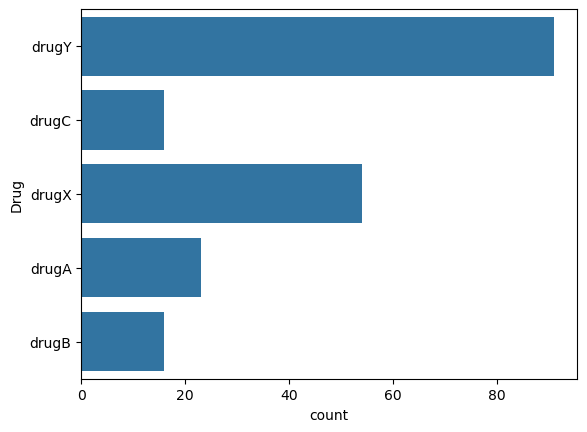

In [98]:
sns.countplot( my_data["Drug"])
my_data["Drug"].value_counts()

In [81]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = my_data["Drug"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [105]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [107]:
yhat = drugTree.predict(X_test)
accuracy_score(y_test, yhat)

0.9833333333333333

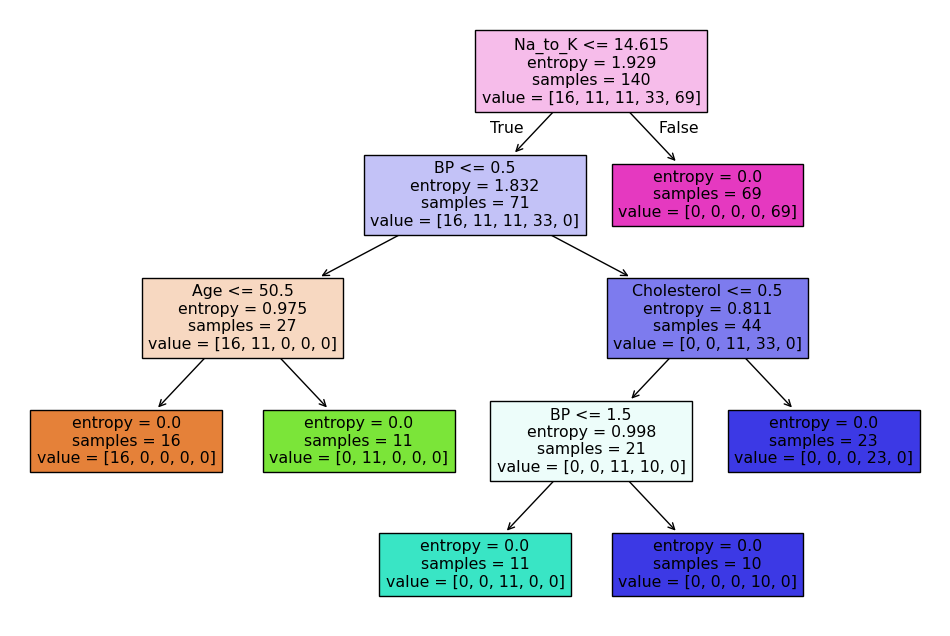

In [109]:
plt.figure(figsize=(12,8))
plot_tree(drugTree, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
plt.show()

0.8166666666666667


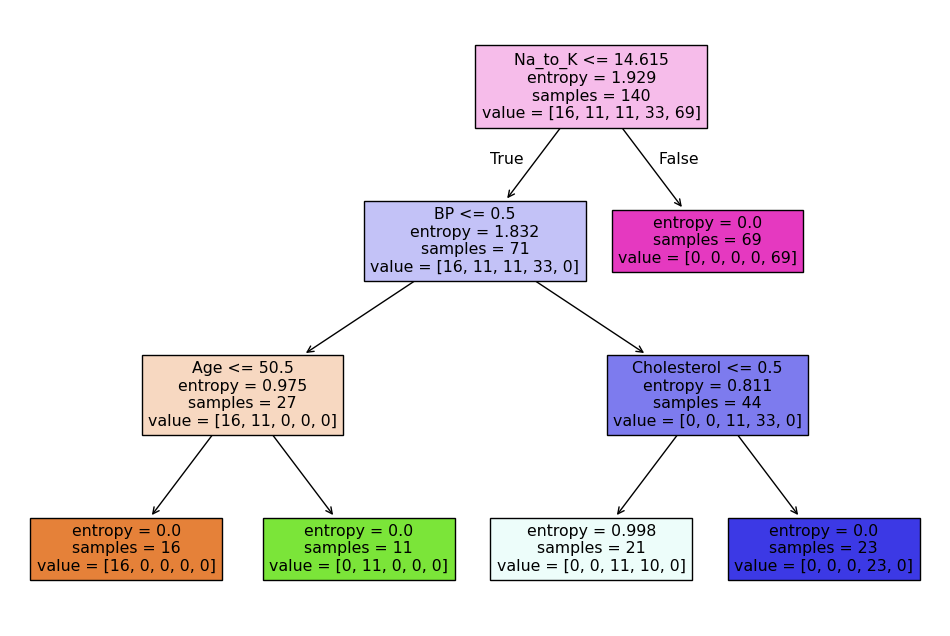

In [115]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(X_train,y_train)
yhat = drugTree.predict(X_test)
print(accuracy_score(y_test, yhat))
plt.figure(figsize=(12,8))
plot_tree(drugTree, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
plt.show()